# MAHARASHTRA COVID ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


# DATA PREPROCESSING

In [2]:
data=pd.read_csv("D:/User/Desktop/Covid_Data/covid_19_india.csv")
data2=pd.read_csv('D:/User/Desktop/Covid_Data/StatewiseTestingDetails.csv')

In [3]:
data2['State'].value_counts()

Kerala                                      55
West Bengal                                 51
Odisha                                      51
Haryana                                     50
Madhya Pradesh                              50
Maharashtra                                 50
Karnataka                                   50
Rajasthan                                   50
Uttar Pradesh                               49
Tamil Nadu                                  49
Bihar                                       49
Uttarakhand                                 49
Punjab                                      48
Chandigarh                                  47
Delhi                                       47
Gujarat                                     47
Jammu and Kashmir                           47
Andhra Pradesh                              46
Mizoram                                     45
Himachal Pradesh                            45
Nagaland                                    44
Jharkhand    

In [4]:
mdata2=data2[data2['State']=='Maharashtra']

In [5]:
mdata2.tail(5)

,Date,State,TotalSamples,Negative,Positive
826,5/21/2020,Maharashtra,319921,276369.0,39297.0
827,5/22/2020,Maharashtra,333087,286157.0,41642.0
828,5/23/2020,Maharashtra,348932,299107.0,44582.0
829,5/24/2020,Maharashtra,363470,310565.0,47190.0
830,5/25/2020,Maharashtra,379185,323937.0,50231.0


In [6]:
from datetime import datetime,date

In [7]:
m=data[data['State/UnionTerritory']=='Maharashtra']

In [8]:
m.tail(5)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
2255,2256,24/05/20,8:00 AM,Maharashtra,-,-,13404,1577,47190
2290,2291,25/05/20,8:00 AM,Maharashtra,-,-,14600,1635,50231
2325,2326,26/05/20,8:00 AM,Maharashtra,-,-,15786,1695,52667
2361,2362,27/05/20,8:00 AM,Maharashtra,-,-,16954,1792,54758
2397,2398,28/05/20,8:00 AM,Maharashtra,-,-,17918,1897,56948


In [9]:
m['Date']=m['Date'].map(lambda dtt:datetime.strptime(dtt,'%d/%m/%y').strftime("%d,%m,%y"))
mdata2['Date']=mdata2['Date'].map(lambda dtt:datetime.strptime(dtt,'%m/%d/%Y').strftime("%d,%m,%y"))

C:\Users\SUDHANSHU\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\SUDHANSHU\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:

for e in range(len(m['Date'])):
    
    m['Date'].iloc[e]=abs(datetime.strptime(('29,1,20'),'%d,%m,%y')-datetime.strptime(m['Date'].iloc[e],'%d,%m,%y'))
for e in range(len(mdata2['Date'])):
    mdata2['Date'].iloc[e]=abs(datetime.strptime(('29,1,20'),'%d,%m,%y')-datetime.strptime(mdata2['Date'].iloc[e],'%d,%m,%y'))

C:\Users\SUDHANSHU\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\SUDHANSHU\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SUDHANSHU\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [11]:
m['Date']=m['Date'].map(lambda dt:str(dt).split(' ')[0])
mdata2['Date']=mdata2['Date'].map(lambda dt:str(dt).split(' ')[0])


C:\Users\SUDHANSHU\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\SUDHANSHU\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
mdata3=mdata2.iloc[:,[0,2]]

In [13]:
mdata3

,Date,TotalSamples
781,67,16008
782,68,17563
783,69,20877
784,71,20877
785,72,30000
786,73,31841
787,74,35668
788,75,39725
789,76,41071
790,77,45142


In [15]:
type(mdata3['Date'].iloc[1] )

str

In [16]:
test=[]
for i in range(len(m['Date'])):

    for j in range(len(mdata3['Date'])):
        if m['Date'].iloc[i]==mdata3['Date'].iloc[j]:
            test.insert(i,int(mdata3['TotalSamples'].iloc[j]))
    else:
        test.insert(j,0)
        

40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120


In [19]:
m.head(5)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
76,77,40,6:00 PM,Maharashtra,2,0,0,0,2
91,92,41,6:00 PM,Maharashtra,5,0,0,0,5
97,98,42,6:00 PM,Maharashtra,2,0,0,0,2
120,121,43,6:00 PM,Maharashtra,11,0,0,0,11
133,134,44,6:00 PM,Maharashtra,14,0,0,0,14


# DATA ANALYSIS

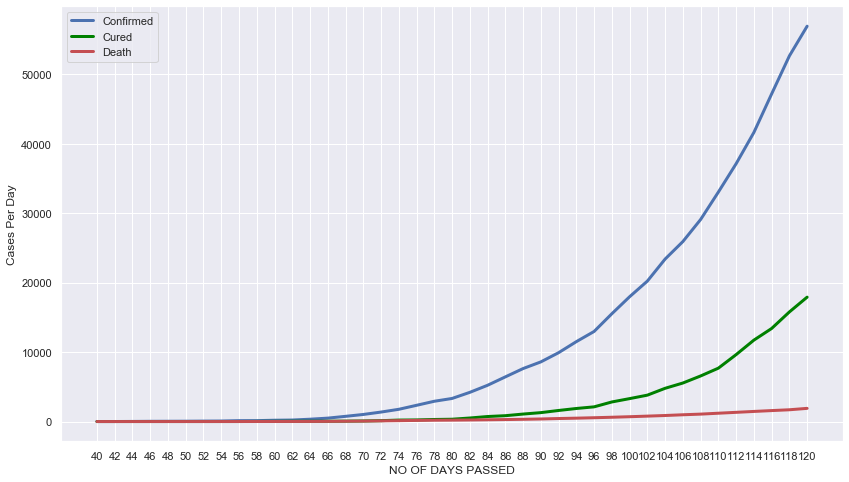

In [20]:
fix=plt.figure(figsize=(14,8))
plt.plot(m['Date'].iloc[::2],m['Confirmed'].iloc[::2],c='b',label='Confirmed',linewidth=3)
plt.plot(m['Date'].iloc[::2],m['Cured'].iloc[::2],c='green',label='Cured',linewidth=3)
plt.plot(m['Date'].iloc[::2],m['Deaths'].iloc[::2],c='r',label='Death',linewidth=3)
plt.xlabel('NO OF DAYS PASSED')
plt.ylabel('Cases Per Day')
plt.legend()

As we can see that No of cases per day is increasing Very rapidly also the No of pepople getting Cured is increasing 
at a good rate but Though we can see that Death is quite negligible but thats not the case.

Lets look at it independetly.


In [21]:
active=m['Confirmed']-m['Cured']

In [22]:
len(active)

81

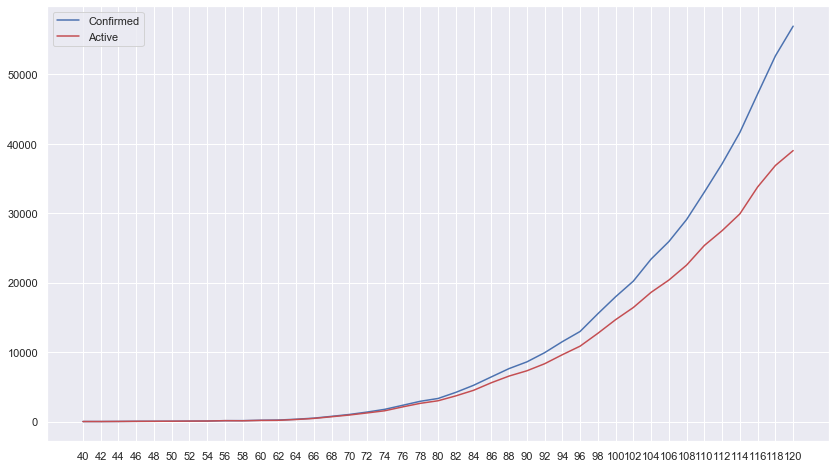

In [23]:
fix=plt.figure(figsize=(14,8))
plt.plot(m['Date'].iloc[::2],m['Confirmed'].iloc[::2],c='b',label='Confirmed')
plt.plot(m['Date'].iloc[::2],active[::2],c='r',label='Active')
plt.legend()

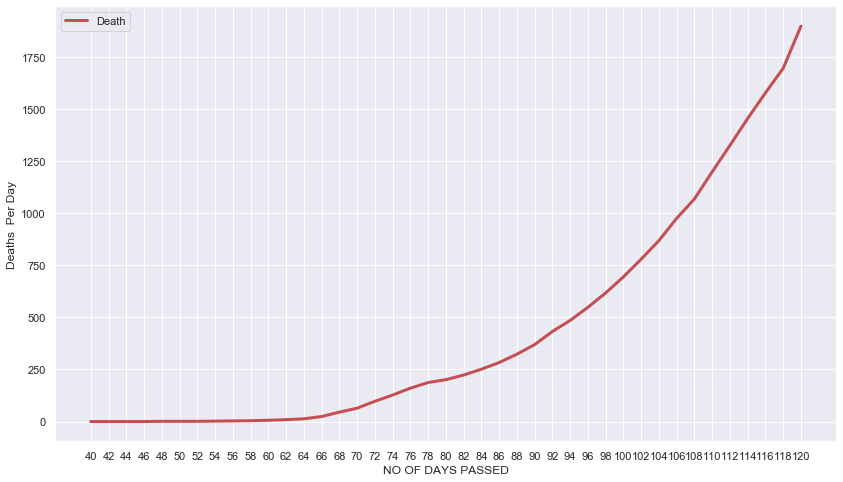

In [24]:
fix=plt.figure(figsize=(14,8))
plt.plot(m['Date'].iloc[::2],m['Deaths'].iloc[::2],c='r',label='Death',linewidth=3)
plt.xlabel('NO OF DAYS PASSED')
plt.ylabel('Deaths  Per Day')
plt.legend()

As we can see that as the no of days are increasing there are more than *1750 death a Day* Whic is not at all good.



# % OF PEOPLE GETTING CURRED AND DIED FROM THE COMPERMED CASES PER DAY

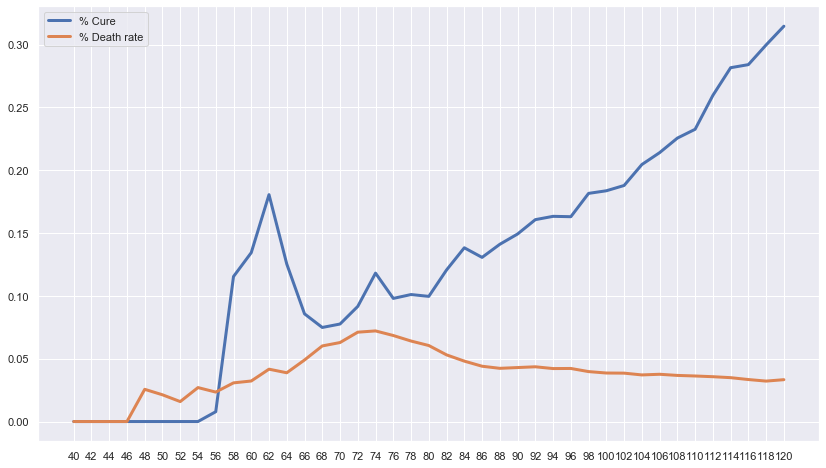

In [25]:
fix=plt.figure(figsize=(14,8))
plt.plot(m['Date'].iloc[::2],m['Cured'].iloc[::2]/m['Confirmed'].iloc[::2],label='% Cure',linewidth=3)
plt.plot(m['Date'].iloc[::2],m['Deaths'].iloc[::2]/m['Confirmed'].iloc[::2],label='% Death rate',linewidth=3)
plt.legend()


In [26]:
m

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
76,77,40,6:00 PM,Maharashtra,2,0,0,0,2
91,92,41,6:00 PM,Maharashtra,5,0,0,0,5
97,98,42,6:00 PM,Maharashtra,2,0,0,0,2
120,121,43,6:00 PM,Maharashtra,11,0,0,0,11
133,134,44,6:00 PM,Maharashtra,14,0,0,0,14
...,...,...,...,...,...,...,...,...,...
2255,2256,116,8:00 AM,Maharashtra,-,-,13404,1577,47190
2290,2291,117,8:00 AM,Maharashtra,-,-,14600,1635,50231
2325,2326,118,8:00 AM,Maharashtra,-,-,15786,1695,52667
2361,2362,119,8:00 AM,Maharashtra,-,-,16954,1792,54758


In [27]:
x=(m.iloc[:,[1]]).astype(int)
y=m.iloc[:,[-2]].astype(int)#np.array(active).reshape((len(active),1))

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=4)
lr=LinearRegression()
x_poly=poly.fit_transform(x)
poly.fit(x_poly,y)
lr.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
y_pred=lr.predict(poly.fit_transform(x))

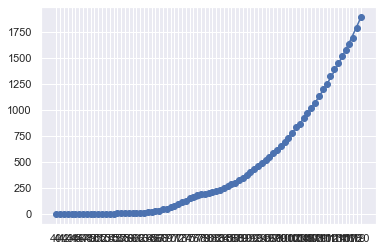

In [30]:
plt.scatter(m['Date'],y)
plt.plot(m['Date'],y_pred)

# PREDICATION

# If we didn't took any effective steps to prevent Covid_19

In [31]:
lr.predict(poly.fit_transform([[120]]))

array([[1888.9110318]])

# ENTER THE No Of Days After which You Want to Preict the No of Death 

HERE THE NO OF DAYS IS CONCIDERED FROM 29 JAN 2020

BELLOW WE ARE PREDECING THE NO OF DATHES ON *122th* i.e ON 30th MARCH 2020 

In [36]:
no_of_days=122 

In [37]:
lr.predict(poly.fit_transform([[no_of_days]]))

array([[2062.04607332]])

# Verifying From Official Data

ON 29th MARCH WE PREDICTED-1974 deaths ,ACTUAL -1982

ON30th MARCH WE PREDICTED- 2062 deaths, ACTUALL -2098

THIS SHOWS THAT THE PREDICTION ARE VERY ACCURATE.